# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [45]:
import pandas as pd

In [46]:
samplns_data = pd.read_json("./05_clean_data.json.zip")
from _conf import EXTENDED_BASELINE_DATA

baseline_data = pd.read_json(EXTENDED_BASELINE_DATA)
baseline_data

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime,sample_size,path_to_baseline_sample,archive_path
0,calculate,9,15,ACTS-IPOG-FT,t2,1620,9.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
1,lcm,9,16,ACTS-IPOG-FT,t2,485,9.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
2,email,10,17,ACTS-IPOG-FT,t2,514,8.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
3,ChatClient,14,20,ACTS-IPOG-FT,t2,538,10.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
4,toybox_2006-10-31_23-30-06,16,13,ACTS-IPOG-FT,t2,485,13.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
...,...,...,...,...,...,...,...,...,...
1945,freetz,31012,102705,FIDE-YASA,t2_m10_null,900009,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1946,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1947,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1948,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip


In [47]:
extended_baseline_data

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime,sample_size,path_to_baseline_sample,archive_path
0,calculate,9,15,ACTS-IPOG-FT,t2,1620,9.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
1,lcm,9,16,ACTS-IPOG-FT,t2,485,9.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
2,email,10,17,ACTS-IPOG-FT,t2,514,8.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
3,ChatClient,14,20,ACTS-IPOG-FT,t2,538,10.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
4,toybox_2006-10-31_23-30-06,16,13,ACTS-IPOG-FT,t2,485,13.0,QuBRA/FeatJAR/evaluation-sampling-algorithms/r...,./EXTERNAL_INPUT/baseline.zip
...,...,...,...,...,...,...,...,...,...
1945,freetz,31012,102705,FIDE-YASA,t2_m10_null,900009,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1946,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1947,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
1948,freetz,31012,102705,FIDE-YASA,t2_m10_null,900008,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip


In [48]:
baseline_data = extended_baseline_data

In [49]:
best_lower_bound = (
    samplns_data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)
best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound

,instance_name,best_lower_bound
0,APL,7
1,APL-Model,8
2,BankingSoftware,28
3,BattleofTanks,256
4,ChatClient,7
5,DMIE,16
6,E-Shop,8
7,EMBToolkit,1741
8,FameDB,8
9,FeatureIDE,7


In [50]:
best_lower_bound["internal_best"] = best_lower_bound["best_lower_bound"]
from _conf import EXTERNAL_BOUNDS

external_best_lb = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_lower_bound"]
    .max()
    .reset_index()
)
best_lower_bound = (
    pd.concat([best_lower_bound, external_best_lb])
    .groupby(["instance_name"])[["best_lower_bound", "internal_best"]]
    .max()
    .reset_index()
)
best_lower_bound

,instance_name,best_lower_bound,internal_best
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,28,28.0
3,BattleofTanks,256,256.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,10,8.0
7,EMBToolkit,1872,1741.0
8,FameDB,8,8.0
9,FeatureIDE,7,7.0


In [65]:
samplns_data = samplns_data[["instance_name", "lower_bound", "upper_bound"]]
samplns_data = samplns_data.merge(best_lower_bound, on="instance_name")
# How many percent is the solution above the best lower bound?
samplns_data["gap"] = 100 * (
    samplns_data["upper_bound"] / samplns_data["best_lower_bound"] - 1
)
samplns_data["algorithm_name"] = "SampLNS"
samplns_data.groupby("instance_name")[["lower_bound", "upper_bound", "gap"]].mean()

,lower_bound,upper_bound,gap
instance_name,,,
APL,7.0,7.0,0.000000
APL-Model,8.0,8.0,0.000000
BankingSoftware,28.0,29.0,3.571429
BattleofTanks,256.0,343.8,34.296875
ChatClient,7.0,7.0,0.000000
DMIE,16.0,16.2,1.250000
E-Shop,8.0,12.2,22.000000
EMBToolkit,1592.6,1889.0,0.908120
FameDB,8.0,8.0,0.000000


In [64]:
samplns_data.groupby("instance_name")[["gap"]].mean().reset_index()[["gap"]].mean()

gap    14.958748
dtype: float64

In [52]:
baseline_data = baseline_data[
    ["instance_name", "sample_size", "baseline_alg", "baseline_alg_conf"]
]
baseline_data = baseline_data.merge(best_lower_bound, on="instance_name")

baseline_data["gap"] = 100 * (
    (baseline_data["sample_size"] / baseline_data["best_lower_bound"]) - 1
)


def baseline_alg_name(row):
    settings = row["baseline_alg_conf"]
    if "_m" in settings:
        m = settings.split("_m")[-1].split("_")[0]
        return f"{row['baseline_alg']}(m={m})"
    return row["baseline_alg"]


baseline_data["algorithm_name"] = baseline_data.apply(baseline_alg_name, axis=1)
# baseline_data.rename(columns={"baseline_alg": "Algorithm"})
baseline_data

,instance_name,sample_size,baseline_alg,baseline_alg_conf,best_lower_bound,internal_best,gap,algorithm_name
0,calculate,9.0,ACTS-IPOG-FT,t2,5,5.0,80.000000,ACTS-IPOG-FT
1,calculate,9.0,ACTS-IPOG-CSP,t2,5,5.0,80.000000,ACTS-IPOG-CSP
2,calculate,10.0,ACTS-IPOF-FT,t2,5,5.0,100.000000,ACTS-IPOF-FT
3,calculate,10.0,ACTS-IPOF-CSP,t2,5,5.0,100.000000,ACTS-IPOF-CSP
4,calculate,9.0,FIDE-ICPL,t2,5,5.0,80.000000,FIDE-ICPL
...,...,...,...,...,...,...,...,...
1789,ea2468,67.0,FIDE-YASA,t2_m10_null,31,31.0,116.129032,FIDE-YASA(m=10)
1790,ea2468,67.0,FIDE-YASA,t2_m10_null,31,31.0,116.129032,FIDE-YASA(m=10)
1791,ea2468,67.0,FIDE-YASA,t2_m10_null,31,31.0,116.129032,FIDE-YASA(m=10)
1792,ea2468,67.0,FIDE-YASA,t2_m10_null,31,31.0,116.129032,FIDE-YASA(m=10)


In [53]:
gaps = pd.concat(
    [
        samplns_data[["algorithm_name", "instance_name", "gap"]],
        baseline_data[["algorithm_name", "instance_name", "gap"]],
    ]
)
gaps

,algorithm_name,instance_name,gap
0,SampLNS,busybox-1_18_0,38.461538
1,SampLNS,busybox-1_18_0,38.461538
2,SampLNS,busybox-1_18_0,46.153846
3,SampLNS,busybox-1_18_0,38.461538
4,SampLNS,busybox-1_18_0,38.461538
...,...,...,...
1789,FIDE-YASA(m=10),ea2468,116.129032
1790,FIDE-YASA(m=10),ea2468,116.129032
1791,FIDE-YASA(m=10),ea2468,116.129032
1792,FIDE-YASA(m=10),ea2468,116.129032


In [54]:
gaps["algorithm_name"].unique().tolist()

['SampLNS',
 'ACTS-IPOG-FT',
 'ACTS-IPOG-CSP',
 'ACTS-IPOF-FT',
 'ACTS-IPOF-CSP',
 'FIDE-ICPL',
 'FIDE-Chvatal',
 'Incling',
 'FIDE-YASA(m=1)',
 'FIDE-YASA(m=3)',
 'FIDE-YASA(m=5)',
 'FIDE-YASA(m=10)']

In [55]:
algorithm_selection = [
    "SampLNS",
    "FIDE-ICPL",
    "FIDE-Chvatal",
    "Incling",
    "FIDE-YASA(m=1)",
    "FIDE-YASA(m=3)",
    "FIDE-YASA(m=5)",
    "FIDE-YASA(m=10)",
    "ACTS-IPOG-FT",
    "ACTS-IPOG-CSP",
    "ACTS-IPOF-FT",
    "ACTS-IPOF-CSP",
]
t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t.dropna(inplace=True)
t = t.groupby("instance_name")[["algorithm_name"]].nunique()
instances_solved_by_all = t[
    t["algorithm_name"] == len(algorithm_selection)
].index.tolist()
instances_solved_by_all

['APL',
 'APL-Model',
 'ChatClient',
 'FameDB',
 'FeatureIDE',
 'SortingLine',
 'TightVNC',
 'Violet',
 'axTLS',
 'busybox_2007-01-24_09-14-09',
 'busybox_2020-12-16_21-53-05',
 'calculate',
 'car',
 'dell',
 'email',
 'gpl',
 'lcm',
 'soletta_2015-06-26_18-38-56',
 'toybox_2006-10-31_23-30-06',
 'toybox_2020-12-06_00-02-46']

In [56]:
print(len(instances_solved_by_all), "instances solved by all")

20 instances solved by all


In [57]:
t = gaps[gaps["instance_name"].isin(instances_solved_by_all)].copy()
t["Instances"] = f"Common subset [{len(instances_solved_by_all)}]"
gaps["Instances"] = "Ignore unsolved"
gaps = pd.concat([gaps, t], ignore_index=True)
gaps

,algorithm_name,instance_name,gap,Instances
0,SampLNS,busybox-1_18_0,38.461538,Ignore unsolved
1,SampLNS,busybox-1_18_0,38.461538,Ignore unsolved
2,SampLNS,busybox-1_18_0,46.153846,Ignore unsolved
3,SampLNS,busybox-1_18_0,38.461538,Ignore unsolved
4,SampLNS,busybox-1_18_0,38.461538,Ignore unsolved
...,...,...,...,...
2899,FIDE-YASA(m=10),busybox_2020-12-16_21-53-05,78.947368,Common subset [20]
2900,FIDE-YASA(m=10),busybox_2020-12-16_21-53-05,78.947368,Common subset [20]
2901,FIDE-YASA(m=10),busybox_2020-12-16_21-53-05,78.947368,Common subset [20]
2902,FIDE-YASA(m=10),busybox_2020-12-16_21-53-05,78.947368,Common subset [20]


In [58]:
gaps["solved"] = 0.0
gaps.loc[~gaps["gap"].isna(), "solved"] = 1
gaps.groupby(["algorithm_name"])[["gap"]].mean()

,gap
algorithm_name,
ACTS-IPOF-CSP,71.493888
ACTS-IPOF-FT,74.533881
ACTS-IPOG-CSP,78.478908
ACTS-IPOG-FT,81.312735
FIDE-Chvatal,87.624313
FIDE-ICPL,88.102246
FIDE-YASA(m=1),68.433796
FIDE-YASA(m=10),49.208973
FIDE-YASA(m=3),54.287227


In [59]:
num_instances_solved_by_alg = (
    gaps.dropna().groupby("algorithm_name")["instance_name"].nunique().to_dict()
)
num_instances_solved_by_alg

{'ACTS-IPOF-CSP': 21,
 'ACTS-IPOF-FT': 23,
 'ACTS-IPOG-CSP': 22,
 'ACTS-IPOG-FT': 23,
 'FIDE-Chvatal': 37,
 'FIDE-ICPL': 45,
 'FIDE-YASA(m=1)': 46,
 'FIDE-YASA(m=10)': 46,
 'FIDE-YASA(m=3)': 46,
 'FIDE-YASA(m=5)': 46,
 'Incling': 45,
 'SampLNS': 46}

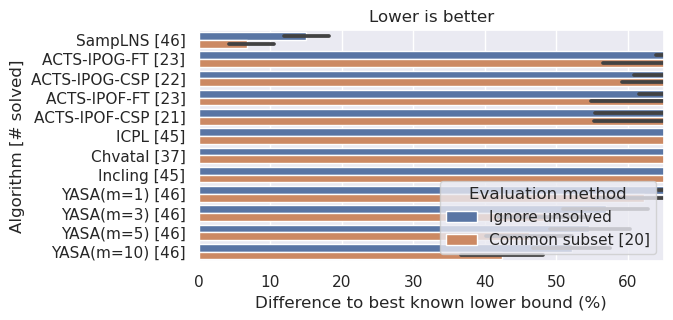

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()

f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap", hue="Instances")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 65)
plt.show()

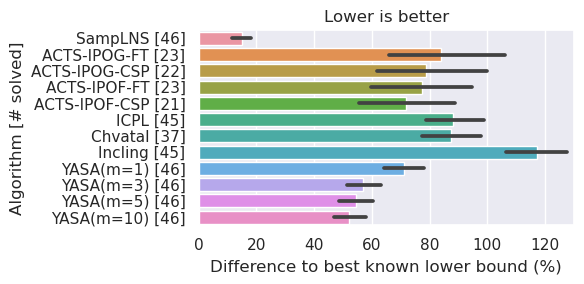

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t = t[t["Instances"] == "Ignore unsolved"]
f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
# plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 130)
plt.tight_layout()
plt.savefig("./OUTPUT/07_lower_bound_gap.pdf")
plt.show()

In [62]:
# How many instances have been solved to optimality by the baseline algorithms? (Note that this is a lower bound)
t = gaps.groupby(["algorithm_name", "instance_name"])[["gap"]].min() == 0
t.reset_index().groupby("algorithm_name").sum()

,instance_name,gap
algorithm_name,,
ACTS-IPOF-CSP,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOF-FT,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOG-CSP,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOG-FT,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
FIDE-Chvatal,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
FIDE-ICPL,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
FIDE-YASA(m=1),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,1
FIDE-YASA(m=10),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,4
FIDE-YASA(m=3),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,3


In [63]:
# How many instances have a gap of less than 10%?
t = gaps.groupby(["algorithm_name", "instance_name"])[["gap"]].min() <= 10
t.reset_index().groupby("algorithm_name").sum()

,instance_name,gap
algorithm_name,,
ACTS-IPOF-CSP,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOF-FT,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOG-CSP,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOG-FT,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
FIDE-Chvatal,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,2
FIDE-ICPL,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,4
FIDE-YASA(m=1),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,8
FIDE-YASA(m=10),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,10
FIDE-YASA(m=3),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,9
